# Linear Discriminant Analysis 
## Emre Can Açıkgöz
### January 15, 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as linalg
import scipy.spatial.distance as dt

# Step 1: Import Data

In [2]:
# read data into memory
X_Train = np.genfromtxt("training_images.csv", delimiter = ",")
y_Train = np.genfromtxt("training_labels.csv", delimiter = ",").astype(int)

X_Test = np.genfromtxt("test_images.csv", delimiter = ",")
y_Test = np.genfromtxt("test_labels.csv", delimiter = ",").astype(int)

# get number of samples and number of features
N = X_Train.shape[0]
D = X_Train.shape[1]
K = np.max(y_Train)

# Step 2: Implement LDA

In [3]:
# calculate class means
class_means = [np.mean(X_Train[y_Train == (c + 1)], axis = 0) for c in range(K)] 

In [4]:
# calculate within-class scatter matrix
wScatter = [np.matmul((X_Train[y_Train == (c + 1)] - class_means[c]).T, (X_Train[y_Train == (c + 1)] - class_means[c])) for c in range(K)]
wScatter2 = [np.cov(np.transpose(X_Train[y_Train == (c + 1)])) for c in range(K)]

In [5]:
# create diagonal matrix
a = np.zeros((784, 784), float)
np.fill_diagonal(a, 1e-10)

In [6]:
# calculate total within-class scatter
wScatter_total = wScatter[0] + wScatter[1] + wScatter[2] + a

In [7]:
# Scatter of the means
class_means_total = (class_means[0] + class_means[1] + class_means[2]) / K

In [8]:
# calculate sample numbers for each group
group_1 = 0
group_2 = 0
group_3 = 0
for elem in y_Train:
    if elem == 1:
        group_1+=1
    elif elem == 2:
        group_2 += 1
    elif elem == 3:
        group_3 += 1

num_samples = [group_1, group_2, group_3]

In [9]:
# calculate between-class scatter matrix
bScatter_1 = num_samples[0] * np.outer((class_means[0]-class_means_total), np.transpose(class_means[0]-class_means_total))
bScatter_2 = num_samples[1] * np.outer((class_means[1]-class_means_total), np.transpose(class_means[1]-class_means_total))
bScatter_3 = num_samples[2] * np.outer((class_means[2]-class_means_total), np.transpose(class_means[2]-class_means_total))

bScatter = bScatter_1 + bScatter_2 + bScatter_3

In [10]:
# calculate Sw^(-1)*Sb
wScatter_inv = np.linalg.inv(wScatter_total)
main_Matrix = np.matmul(wScatter_inv, bScatter)

In [11]:
# calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = linalg.eigh(main_Matrix)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

# Step 3: Calculate 2-Dimensional Projections on Training and Test Data

In [12]:
# project training set and test set
Z = np.matmul(X_Train - np.mean(X_Train, axis = 0), eigenvectors[:,[0, 1]])
Z_Test = np.matmul(X_Test - np.mean(X_Test, axis = 0), eigenvectors[:,[0, 1]])

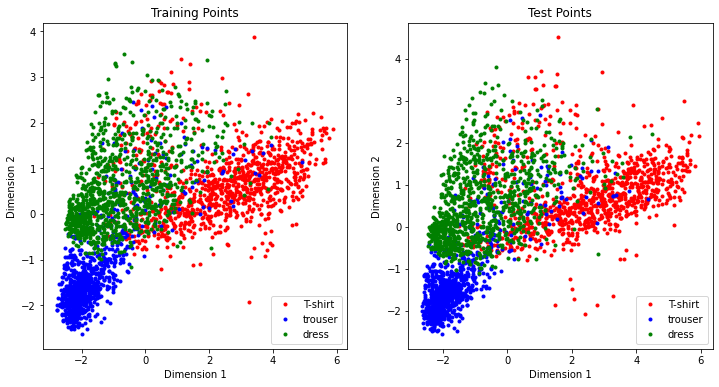

In [13]:
# plot two-dimensional projections
plt.figure(figsize = (12, 6)) 
plt.subplot(1, 2, 1)
plt.plot(Z[y_Train == 1, 0], -Z[y_Train == 1, 1], '.r', label = 'T-shirt')
plt.plot(Z[y_Train == 2, 0], -Z[y_Train == 2, 1], '.b', label = 'trouser')
plt.plot(Z[y_Train == 3, 0], -Z[y_Train == 3, 1], '.g', label = 'dress')
plt.legend(loc='lower right')
plt.title("Training Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.subplot(1, 2, 2)
plt.plot(Z_Test[y_Test == 1, 0], -Z_Test[y_Test == 1, 1], '.r', label = 'T-shirt')
plt.plot(Z_Test[y_Test == 2, 0], -Z_Test[y_Test == 2, 1], '.b', label = 'trouser')
plt.plot(Z_Test[y_Test == 3, 0], -Z_Test[y_Test == 3, 1], '.g', label = 'dress')
plt.legend(loc='lower right')
plt.title("Test Points")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Step 4: Learn 5-Nearest Neighbor Classifier

In [14]:
# KNN algorithm for Training set
np.random.seed(421)
feature_subset_size = 2
N_test = Z.shape[0]
D1 = Z.shape[1]
k = 5

predicted_probabilities = np.zeros((N_test, K))

selected_features = np.random.choice(range(D1), size = feature_subset_size, replace = False)
distance_matrix = dt.cdist(Z[:, selected_features], Z[:, selected_features])
for c in range(K):
    predicted_probabilities[:, c] = np.asarray([sum(y_Train[np.argsort(distance_matrix[i, :])[range(k)]] == c + 1) for i in range(N_test)]) / k

In [15]:
# calculate confusion matrix for training set
y_predicted = np.argmax(predicted_probabilities, axis=1) +1
confusion_matrix = pd.crosstab(y_Train,y_predicted, rownames = ['y_train'], colnames = ['y_pred'])
print(confusion_matrix)

y_pred     1    2    3
y_train               
1        886   14  112
2         40  845   89
3         86   47  881


In [16]:
# KNN algorithm for Test set
N_test = Z_Test.shape[0]
D1 = Z_Test.shape[1]
k = 5

predicted_probabilities2 = np.zeros((N_test, K))

selected_features2 = np.random.choice(range(D1), size = feature_subset_size, replace = False)
distance_matrix2 = dt.cdist(Z_Test[:, selected_features2], Z_Test[:, selected_features2])
for c in range(K):
    predicted_probabilities2[:, c] = np.asarray([sum(y_Test[np.argsort(distance_matrix2[i, :])[range(k)]] == c + 1) for i in range(N_test)]) / k

In [19]:
# calculate confusion matrix for test set
y_predicted2 = np.argmax(predicted_probabilities2, axis=1) + 1
confusion_matrix2 = pd.crosstab(y_Test, y_predicted2, rownames = ['y_test'], colnames = ['y_pred'])
print(confusion_matrix2)

y_pred    1    2    3
y_test               
1       898    9   93
2        57  857   86
3       121   33  846
